### Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzip dataset

In [2]:
cd /content/drive/MyDrive/nlp_project_customer_support

/content/drive/MyDrive/nlp_project_customer_support


In [ ]:
!unzip customer_support_dataset.zip

Archive:  customer_support_dataset.zip
  inflating: sample.csv              
  inflating: twcs/twcs.csv           


### Show inbound tweets and responses from companies

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
tweets = pd.read_csv('/content/drive/MyDrive/nlp_project_customer_support/twcs/twcs.csv')

In [4]:
# Pick only inbound tweets that aren't in reply to anything...
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]
print('Found {} first inbound messages.'.format(len(first_inbound)))

Found 787346 first inbound messages.


In [5]:
# Merge in all tweets in response
inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')
print("Found {} responses.".format(len(inbounds_and_outbounds)))

# Filter out cases where reply tweet isn't from company
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

# Et voila!
print("Found {} responses from companies.".format(len(inbounds_and_outbounds)))
print("Tweets Preview:")
print(inbounds_and_outbounds)

Found 875292 responses.
Found 794299 responses from companies.
Tweets Preview:
        tweet_id_x author_id_x  inbound_x                    created_at_x  \
0                8      115712       True  Tue Oct 31 21:45:10 +0000 2017   
1                8      115712       True  Tue Oct 31 21:45:10 +0000 2017   
2                8      115712       True  Tue Oct 31 21:45:10 +0000 2017   
3               18      115713       True  Tue Oct 31 19:56:01 +0000 2017   
4               20      115715       True  Tue Oct 31 22:03:34 +0000 2017   
...            ...         ...        ...                             ...   
875287     2987942      823867       True  Wed Nov 22 07:30:39 +0000 2017   
875288     2987944      823868       True  Wed Nov 22 07:43:36 +0000 2017   
875289     2987946      524544       True  Wed Nov 22 08:25:48 +0000 2017   
875290     2987948      823869       True  Wed Nov 22 08:35:16 +0000 2017   
875291     2987950      823870       True  Tue Nov 21 22:01:04 +0000 2017 

In [6]:
inbounds_and_outbounds.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


### Perform sentiment analysis on inbound tweets

In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook
import seaborn
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
tqdm_notebook().pandas()

<ipython-input-8-cb18d13d338b>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [9]:
import nltk

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

sentiment_for('I love it!')

0.6696

In [12]:
# Analyze sentiment of inbound customer support requests
inbounds_and_outbounds['inbound_sentiment'] = \
    inbounds_and_outbounds.text_x.progress_apply(sentiment_for)

  0%|          | 0/794299 [00:00<?, ?it/s]

In [13]:
inbounds_and_outbounds.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y,inbound_sentiment
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,-0.6249
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0,-0.6249
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0,-0.6249
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0,-0.3182
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0,0.2144


### Visualize top 20 brands ordered by tweet volume

In [14]:
author_grouped = inbounds_and_outbounds.groupby('author_id_y')


In [15]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id_x'], ascending=[0])
                                .index[:20]
                                .values)

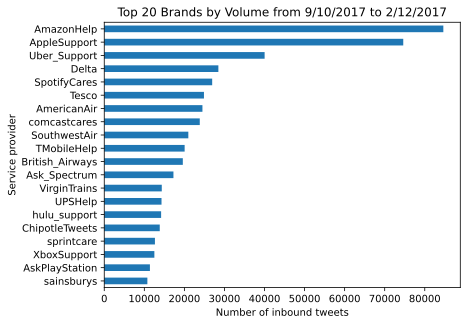

In [16]:
import matplotlib.pyplot as plt

# Create the plot
ax = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .tweet_id_x.count() \
    .sort_values() \
    .plot(kind='barh', title='Top 20 Brands by Volume from 9/10/2017 to 2/12/2017')

# Set the x-axis label
ax.set_xlabel('Number of inbound tweets')

# Set the y-axis label
ax.set_ylabel('Service provider')

# Display the plot
plt.show()


### Visualize top 20 brands (in terms of volume) ordered by customer sentiment

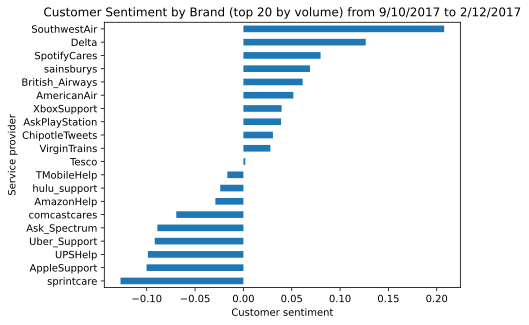

In [17]:
import matplotlib.pyplot as plt

# Create the plot
ax = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .inbound_sentiment.mean() \
    .sort_values() \
    .plot(kind='barh', title='Customer Sentiment by Brand (top 20 by volume) from 9/10/2017 to 2/12/2017')

# Set the x-axis label
ax.set_xlabel('Customer sentiment')

# Set the y-axis label
ax.set_ylabel('Service provider')

# Display the plot
plt.show()


### Measure the impact of new game releases in terms of volume of tweets and customer sentiment for Playstation

In [18]:
import pandas as pd
from datetime import datetime, timezone

inbounds_and_outbounds['created_at_x'] = pd.to_datetime(inbounds_and_outbounds['created_at_x']).dt.tz_convert(timezone.utc)

ask_playStation_tweets = inbounds_and_outbounds.loc[
    (inbounds_and_outbounds.author_id_y == 'AskPlayStation') &
    (inbounds_and_outbounds.created_at_x > datetime(2017, 10, 7, tzinfo=timezone.utc))
]


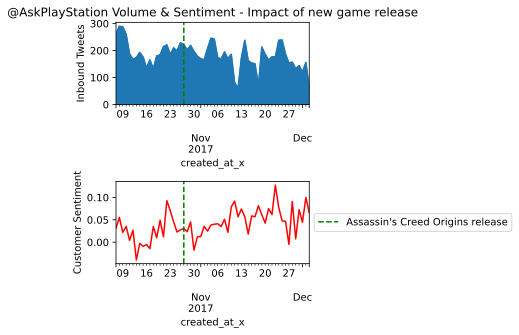

In [19]:
import matplotlib.lines as mlines

plt.subplot(2, 1, 1)

ax1 = ask_playStation_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AskPlayStation Volume & Sentiment - Impact of new game release', kind='area')
ax1.set_ylabel('Inbound Tweets')

# Draw vertical line
ax1.axvline(pd.to_datetime('2017-10-27'), color='green', linestyle='--')

plt.subplot(2, 1, 2)
ax2 = ask_playStation_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax2.set_ylabel('Customer Sentiment')

# Draw vertical line
ax2.axvline(pd.to_datetime('2017-10-27'), color='green', linestyle='--')

# Create a green dotted line
legend_line = mlines.Line2D([], [], color='green', linestyle='--', label="Assassin's Creed Origins release")

# Add the legend line
ax2.legend(handles=[legend_line], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


### Measure the impact of new game releases in terms of volume of tweets and customer sentiment for Xbox

In [20]:
import pandas as pd
from datetime import datetime, timezone

inbounds_and_outbounds['created_at_x'] = pd.to_datetime(inbounds_and_outbounds['created_at_x']).dt.tz_convert(timezone.utc)

xbox_support_tweets = inbounds_and_outbounds.loc[
    (inbounds_and_outbounds.author_id_y == 'XboxSupport') &
    (inbounds_and_outbounds.created_at_x > datetime(2017, 10, 7, tzinfo=timezone.utc))
]

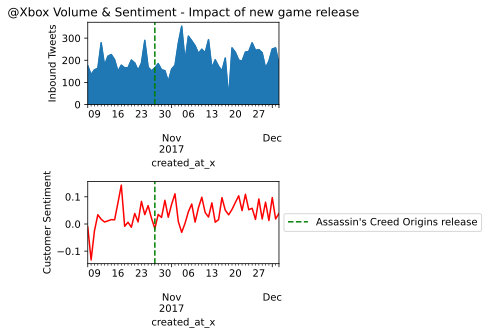

In [21]:
import matplotlib.lines as mlines

plt.subplot(2, 1, 1)

ax1 = xbox_support_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@Xbox Volume & Sentiment - Impact of new game release', kind='area')
ax1.set_ylabel('Inbound Tweets')

# Draw vertical line
ax1.axvline(pd.to_datetime('2017-10-27'), color='green', linestyle='--')

plt.subplot(2, 1, 2)
ax2 = xbox_support_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax2.set_ylabel('Customer Sentiment')

# Draw vertical line
ax2.axvline(pd.to_datetime('2017-10-27'), color='green', linestyle='--')

# Create a green dotted line
legend_line = mlines.Line2D([], [], color='green', linestyle='--', label="Assassin's Creed Origins release")

# Add the legend line
ax2.legend(handles=[legend_line], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()